In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/AI_1333/AI_Tuan5_2/Cayquyetdinh

/content/drive/MyDrive/AI_1333/AI_Tuan5_2/Cayquyetdinh


In [6]:
!git clone https://github.com/aryashah2k/Handwritten-Multiple-Digits-Recognizer.git

Cloning into 'Handwritten-Multiple-Digits-Recognizer'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 244 (delta 48), reused 39 (delta 39), pack-reused 194
Receiving objects: 100% (244/244), 45.32 MiB | 16.31 MiB/s, done.
Resolving deltas: 100% (107/107), done.


In [4]:
import cv2
import numpy as np
from skimage.feature import hog # Nền tảng AI, máy học: đưa sao học sau ra vậy, chưa học chưa ra được. Thuật toán: HOG, SVC (Machine learling), trích xuất đặt trưng ra một vector
from keras.models import load_model
from sklearn.metrics import accuracy_score # accuracy_score : Độ chính xác, độ tin cậy
from keras.datasets import mnist # Deep learning, huấn luyện mô hình, train module, thư viện mnist
from google.colab.patches import cv2_imshow

In [7]:
# Load module
model = load_model('/content/drive/MyDrive/AI_1333/AI_Tuan5_2/Cayquyetdinh/Handwritten-Multiple-Digits-Recognizer/mnist.h5')

1/1 [==============================] - 0s 18ms/step
8 - 100 %


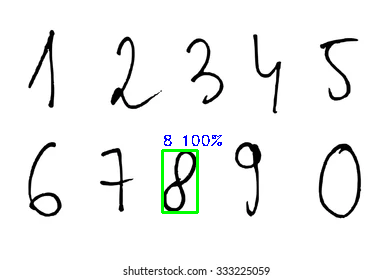

1/1 [==============================] - 0s 17ms/step
7 - 91 %


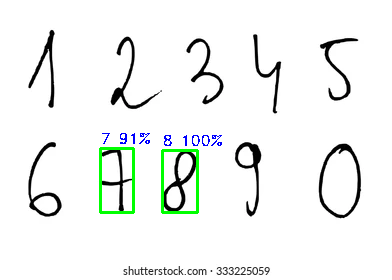

1/1 [==============================] - 0s 22ms/step
0 - 99 %


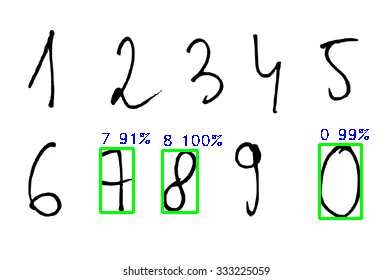

1/1 [==============================] - 0s 18ms/step
2 - 81 %


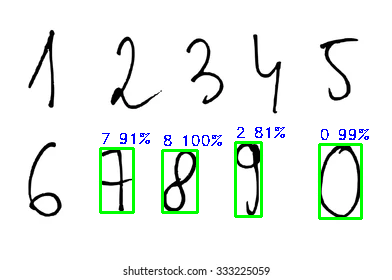

1/1 [==============================] - 0s 16ms/step
6 - 99 %


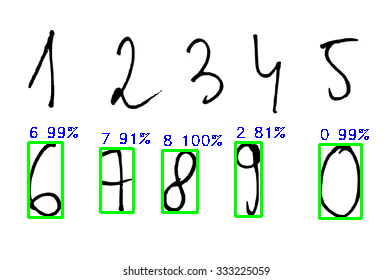

1/1 [==============================] - 0s 16ms/step
5 - 99 %


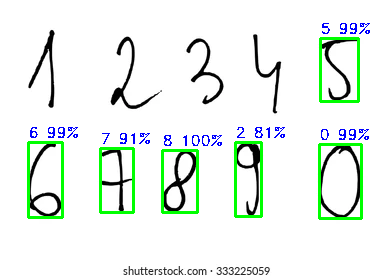

1/1 [==============================] - 0s 17ms/step
3 - 99 %


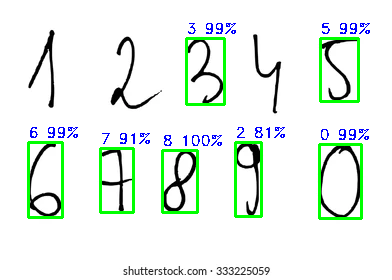

1/1 [==============================] - 0s 18ms/step
2 - 99 %


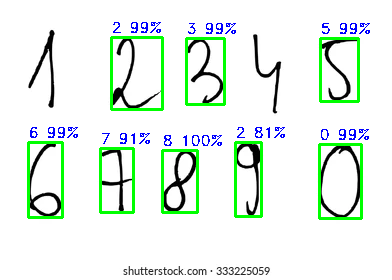

1/1 [==============================] - 0s 16ms/step
4 - 99 %


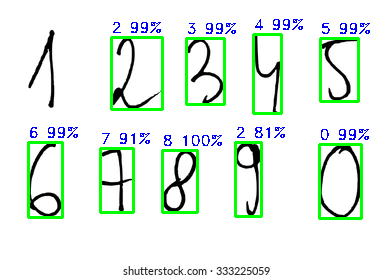

1/1 [==============================] - 0s 16ms/step
4 - 90 %


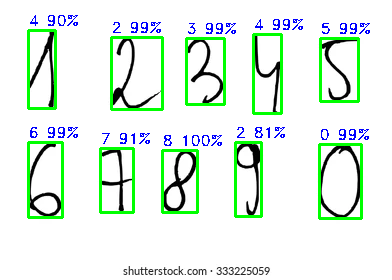

/content/drive/MyDrive/AI_1333/AI_Tuan5_2


True

In [10]:
file_path = '/content/drive/MyDrive/AI_1333/AI_Tuan5_2/handwritten-numbers-vector-260nw-333225059.webp'

image = cv2.imread(file_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

contours = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w>=5 and h >= 25: # Loại bỏ những contour quá nhỏ
          digit = th[y:y + h, x:x + w]
          resized_digit = cv2.resize(digit, (18, 18))
          padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

          digit = padded_digit.reshape(1, 28, 28, 1)
          digit = digit / 255.0

          pred = model.predict([digit])[0]
          final_pred = np.argmax(pred) # Lấy độ hiệu quả cao nhất
          print(final_pred, end=" - ")

          data = str(final_pred) + ' ' + str(int(max(pred) * 100)) + '%'
          print(int(max(pred) * 100), "%")
          # if(int(max(pred) * 100) <= 100):
          if(int(max(pred) * 100) >= 80):
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) # Chỉnh màu khung ở đây
            font = cv2.FONT_HERSHEY_DUPLEX # FONT_HERSHEY_SIMPLEX
            fontScale = 0.5 # Size chữ
            color = (255, 0, 0)
            thickness = 1 # độ rộng line chữ
            #cv2.putText(image, data, (x, y - 5), data, fontScale, color, thickness)
            cv2.putText(image, data, (x, y - 5), font, 0.5, (255, 0, 0), 1) # y - 5: xích lên trên
            cv2_imshow(image)
        
%cd /content/drive/MyDrive/AI_1333/AI_Tuan5_2
cv2.imwrite("image_pand.jpg",image)